## Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
#import ptitprince as pt

## read in the data

In [2]:
df_u=pd.read_csv('data/users_artsy.csv')
df_pv=pd.read_csv('data/pageviews_artsy.csv')


## look into RAW data

In [18]:
df_u.head(15)

,visitor_id,has_inquired,has_an_account,article_pageviews,artist_pageviews,artwork_pageviews
0,0,False,False,0.0,0.0,1.0
1,1,True,False,0.0,0.0,1.0
2,2,True,True,0.0,0.0,1.0
3,3,False,False,0.0,1.0,0.0
4,4,False,False,0.0,0.0,1.0
5,5,False,False,0.0,0.0,0.0
6,6,False,False,0.0,0.0,1.0
7,7,True,True,0.0,1.0,0.0
8,8,False,False,0.0,1.0,0.0
9,9,True,True,0.0,0.0,1.0


# Some notes about the culumns User (2.611 rows)

- '**visitor_id**' = user ID of loged in user

- '**has_inquired**' = whether the user has ever inquired on the site

- '**has_an_account**' = whether the user has registered for an account

- '**article_pageviews**' = how many times the user has viewed an article

- '**artist_pageviews**' = how many times the user has viewed an artist

- '**artwork_pageviews**' = how many times the user has viewed an artwork

In [19]:
df_pv.head(15)

,anonymous_id,logged_in,received_at,path,referrer
0,ad31b961-d67f-497c-9def-9193d518863a,False,2017-03-12 18:23:28.241,/artist/anish-kapoor,http://m.facebook.com
1,dd14cc5c-f31a-4591-974d-1233346b1999,False,2017-03-20 20:36:32.177,/artwork/vernon-fisher-happy-family,NaN
2,9b459a76-aaa3-44cd-9f0e-af7fb9829b2c,False,2017-03-14 05:19:47.852,/article/francesca-gavin-10-new-artists-to-wat...,https://www.google.ge/
3,cb745df7-c90d-4339-9519-960081515b8c,False,2017-03-14 02:50:29.697,/article/artsy-editorial-8-female-surrealists-...,https://l.facebook.com/l.php?u=https%3A%2F%2Fw...
4,8b18968d-4e51-4e00-b60c-d80b1ad6a55c,False,2017-03-15 09:07:07.436,/article/artsy-editorial-why-these-7-artists-q...,https://www.facebook.com/
5,424776e9-5023-4c1a-950b-25da172990cb,False,2017-03-20 13:12:57.453,/gallery-partnerships,NaN
6,38a38aa5-00f6-46e8-8b16-0ca3d1890d2d,False,2017-03-25 01:28:37.583,/artwork/shepard-fairey-marcos-diagram,https://www.google.ca/
7,2f97afde-b7fb-4dc3-aaa8-79fdb100beb3,False,2017-03-23 09:12:22.880,/artist/kehinde-wiley,https://www.google.com.au/
8,b45d3f53-51b3-4a53-a170-af81ceb8c05b,False,2017-03-14 15:52:14.650,/artwork/mario-rossi-plaza-italia,https://www.artsy.net/artwork/mario-rossi-sudo...
9,f983741d-fff2-483e-88b0-e5375d69b7a7,False,2017-03-23 16:02:29.080,/guggenheim,https://www.artsy.net/article/artsy-editorial-...


# Some notes about the culumns Pageviews (100.000 rows)

- '**anonymous_id**' = a random user ID

- '**logged_in**' = a boolean if its a loged in user or not

- '**received_at**' = timestamp

- '**path**' = url of the pageview

- '**referrer**' = referring path where the user is coming from 

### Deeper into every column, na.check

In [6]:
# Check for missing values in df_u
print(df_u.isna().sum())
print("----------------")
# Check for missing values in df_pv
print(df_pv.isna().sum())

visitor_id           0
has_inquired         0
has_an_account       0
article_pageviews    0
artist_pageviews     0
artwork_pageviews    0
dtype: int64
----------------
anonymous_id        0
logged_in           0
received_at         0
path                0
referrer        19965
dtype: int64


### --> only pageviews "referrer" has missing values (19.965 /100.000 = 20%)

In [27]:
df_u.describe()


,visitor_id,article_pageviews,artist_pageviews,artwork_pageviews
count,2611.0000,2611.000000,2611.000000,2611.000000
mean,1305.0000,0.210647,0.409422,0.525469
std,753.8751,0.436875,0.785727,1.007454
min,0.0000,0.000000,0.000000,0.000000
25%,652.5000,0.000000,0.000000,0.000000
50%,1305.0000,0.000000,0.000000,0.000000
75%,1957.5000,0.000000,1.000000,1.000000
max,2610.0000,3.000000,14.000000,15.000000


In [35]:
df_u.artwork_pageviews.value_counts()

artwork_pageviews
0.0     1677
1.0      710
2.0      130
3.0       49
4.0       18
5.0       11
6.0        8
8.0        2
10.0       1
9.0        1
15.0       1
12.0       1
11.0       1
7.0        1
Name: count, dtype: int64

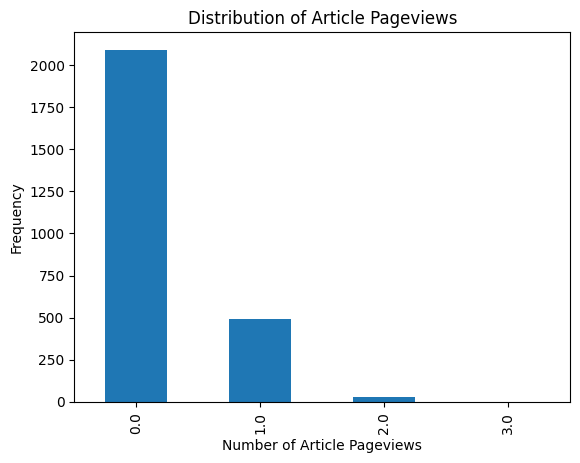

In [32]:
df_u.article_pageviews.value_counts().plot(kind='bar', title='Distribution of Article Pageviews per User')
plt.xlabel('Number of Article Pageviews')
plt.ylabel('Frequency')
plt.show()

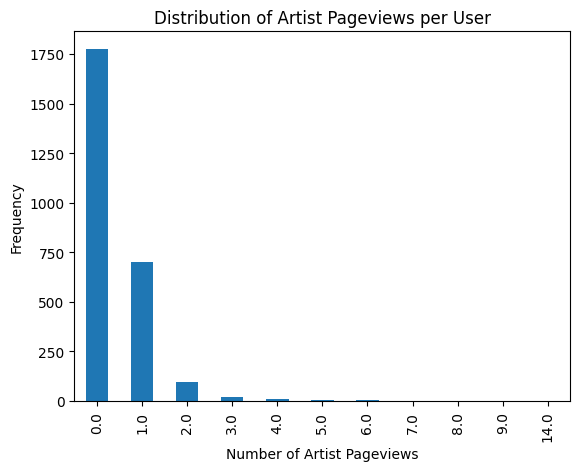

In [47]:
artist_pageviews_counts = df_u.artist_pageviews.value_counts().sort_index()
artist_pageviews_counts.plot(kind='bar', title='Distribution of Artist Pageviews per User')
plt.xlabel('Number of Artist Pageviews')
plt.ylabel('Frequency')
plt.show()


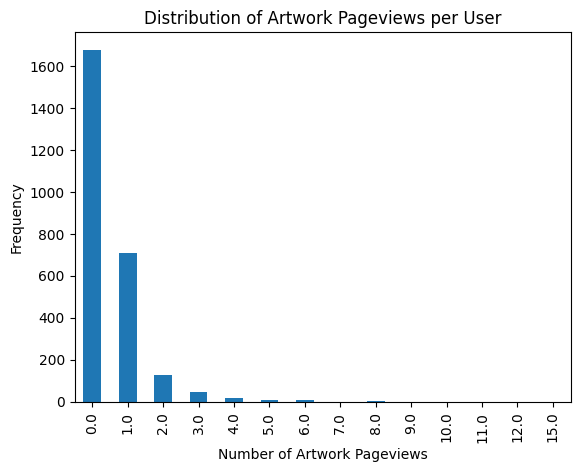

In [48]:
artwork_pageviews_counts = df_u.artwork_pageviews.value_counts().sort_index()
artwork_pageviews_counts.plot(kind='bar', title='Distribution of Artwork Pageviews per User')
plt.xlabel('Number of Artwork Pageviews')
plt.ylabel('Frequency')
plt.show()



In [22]:
df_pv.anonymous_id.value_counts().head(100)

anonymous_id
b55424f5-53eb-44b5-b2d4-f27d077a3086    352
7fa98975-cd45-4741-b106-5f938e795d90    100
10078c13-6097-4adc-9395-a4bc42b96a1c     62
91e878a3-d2cd-4ebf-b497-a6ccc406862f     57
f2d4f27d-077a-4086-8cce-5789b10fbfda     50
                                       ... 
ee6435e6-0039-4553-93a5-89df4919b526     13
1769532e-e1b9-4d69-b216-eb477bb4f5b0     13
e26b0c1e-a2ca-4be5-95a4-0630954e72b8     13
bf5af9f8-fef1-452f-b521-b2dd98d266ee     13
44c6e9da-33ec-4a24-85cd-7471a2da2e05     13
Name: count, Length: 100, dtype: int64

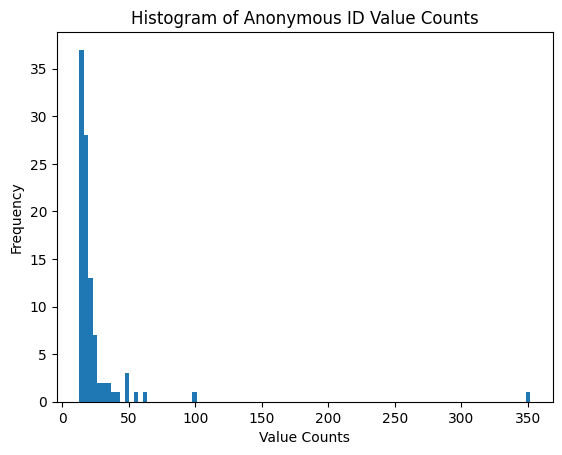

In [26]:
value_counts_sorted = df_pv['anonymous_id'].value_counts().sort_values(ascending=False)
value_counts_sorted.head(100).plot(kind='hist', bins=100, title='Histogram of Anonymous ID Value Counts')
plt.xlabel('Value Counts')
plt.ylabel('Frequency')
plt.show()

#### There are outliers: 
a few users viewd 50+ pages , one person 350, but most user-Ids have less than 50 entries in the dataset

In [50]:
# Check for duplicated rows in df_u
duplicated_rows = df_u[df_u.duplicated()]
print(duplicated_rows)
print('-----------')

# Check for duplicated rows in df_u
duplicated_rows = df_pv[df_pv.duplicated()]
print(duplicated_rows)


Empty DataFrame
Columns: [visitor_id, has_inquired, has_an_account, article_pageviews, artist_pageviews, artwork_pageviews]
Index: []
-----------
Empty DataFrame
Columns: [anonymous_id, logged_in, received_at, path, referrer]
Index: []


In [ ]:
# EXAMPLE Table of all data and their frequency
df_u

In [ ]:
# EXAMPLE Unique values
len(df['yr_renovated'].unique())

In [ ]:
# EXAMPLE: Count NA values
df['yr_renovated'].isna().sum()

In [ ]:
# EXAMPLE Histogram
plt.hist(df['sqft_living15'], bins=200)
plt.show()

In [ ]:
# EXAMPLE Minimum
df['floors'].min(skipna=True)

In [ ]:
# EXAMPLE Maximum
df['floors'].max(skipna=True)

In [ ]:
# Find out the type for every column
df.info()

### Data cleaning 
Information gathered from aboves lines resulted in some needs for cleaning.

In [15]:
df.drop(['id.1', 'house_id'], axis=1, inplace=True)


In [ ]:
# fill NAs
df.waterfront.fillna(0, inplace=True)
df.view.fillna(-1, inplace=True)
df.sqft_basement.fillna(-1, inplace=True)
df.yr_renovated.fillna(0, inplace=True)

In [17]:
df['yr_renovated'] = df['yr_renovated']/10

In [ ]:
df['yr_renovated'].replace(0, np.nan, inplace=True)
# Konvertiere in datetime und lasse NaN unangetastet
df['yr_renovated'] = pd.to_datetime(df['yr_renovated'], format='%Y', errors='coerce')

In [19]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')

In [20]:
df['yr_renovated'] = pd.to_datetime(df['yr_renovated'], format='%Y', errors='coerce')

In [21]:
df[['bedrooms', 'sqft_living', 'sqft_lot', 'view', 'grade', 'sqft_above', 'sqft_basement']] = df[['bedrooms', 'sqft_living', 'sqft_lot', 'view', 'grade', 'sqft_above', 'sqft_basement']].astype('int64')

In [22]:
df['waterfront'] = df['waterfront'].map({0.0: 'No_Waterfront', 1.0: 'Waterfront'})

In [23]:
df[['zipcode', 'condition']] = df[['zipcode', 'condition']].astype('object')

In [ ]:
df.value_counts('waterfront')

# Hypothesis Testing

- H0: waterfront houses are more expensive 
- H1: Waterfront houses are viewed more often on average than non-waterfront houses.
- H2: The square footage of land is smaller for waterfront houses in Kings County.
- H3: There is a positive correlation between the condition of a house and the King County Building Grades.

# H0 plot

In [ ]:
sns.violinplot(x=df['waterfront'], y=df['price'])

In [ ]:
sns.kdeplot(data=df, x="price", hue="waterfront", multiple="stack")
#there are close to no houses on the waterfront

# H2 Plot
Waterfront houses are viewed more often on average than non-waterfront houses.

In [ ]:
sns.violinplot(x=df['waterfront'], y=df['view'])
df['view'].value_counts()

# H2 Plot
The square footage of land is smaller for waterfront houses in Kings County
---> Wrong

In [ ]:
df_filtered = df[df['sqft_lot'] < 30000]

sns.violinplot(x=df_filtered['waterfront'], y=df_filtered['sqft_lot'])

# H3 - Plot: 
There is a positive correlation between the condition of a house and the King County Building Grades. --> wrong

In [232]:
df_filtered = df

In [ ]:
df_filtered[['grade', 'condition']] =  df_filtered[['grade', 'condition']].astype('float64')

noise_mean = 0
noise_std = 0.1
noise_cond = np.random.normal(loc=noise_mean, scale=noise_std, size=df.shape[0])

noise_mean = 0
noise_std = 0.2
noise_grade = np.random.normal(loc=noise_mean, scale=noise_std, size=df.shape[0])

df_filtered['condition_with_noise'] = df_filtered['condition'] + noise_cond
df_filtered['grade_with_noise'] = df_filtered['grade'] + noise_grade



sns.lmplot(
    x="condition_with_noise",
    y="grade_with_noise",
    data=df_filtered,
    hue="waterfront",
)
plt.show()

# Client Erin Robinson
## Unlimited Budget, 4+ bathrooms or smaller house nearby, big lot (tennis court & pool), golf, historic, no waterfront

# finding golf 

from https://gismaps.kingcounty.gov/iMap/
df['zipcode'].value_counts() 

### Interbay Golf Center
2501 15th Ave W, Seattle, WA 98119, Vereinigte Staaten
47.64364, -122.37834
 

### Vashon Island Golf & Country Club
24615 75th Ave SW, Vashon, WA 98070, Vereinigte Staaten
47.38309, -122.42884
auf einer Insel, mit pool 
kinder angebote


### Broadmoor Golf Club
2340 Broadmoor Dr E, Seattle, WA 98112, Vereinigte Staaten
47.64049770129618, -122.28964444365356
japanischer garten 


### Riverbend Golf Complex
2019 W Meeker St, Kent, WA 98032, Vereinigte Staaten
47.380891694211876, -122.2628972397312


in der Postleitzahl 
98119
98070
98112
98032
jeweils die 15 nearest neigbors lot


In [252]:
df_filtered = df
desired_zipcodes = [98119, 98070, 98112, 98032]
df_filtered = df[df['zipcode'].isin(desired_zipcodes)]


In [ ]:
df_filtered.head(15)
df_filtered = df_filtered[df_filtered['bathrooms']>3.5]

sns.displot( data=df_filtered["bathrooms"], kde=True )

In [274]:
df_filtered_sorted_multiple = df_filtered.sort_values(by=['sqft_lot', 'price'],ascending=False)


In [ ]:
df_filtered_sorted_multiple.head(37)
columns_of_interest = ['bathrooms','sqft_lot', 'sqft_living', 'grade', 'yr_built','yr_renovated','sqft_lot15', 'price', 'lat','long']
df_filtered_selected_columns = df_filtered_sorted_multiple[columns_of_interest]
df_filtered_selected_columns

# 3 Recommandations for this client

In [ ]:
# 18314	4.75	24085	4575	10.0	1926	NaT	9687.0	2920000.0	47.6263	-122.284
# 10543	4.25	308080	3300	9.0	1976	NaT	90604.0	729000.0	47.3979	-122.416
# 14172	4.00	30120	4200	11.0	1933	NaT	12200.0	2230000.0	47.6379	-122.311